
# 📊 Varyans ve Standart Sapma: Verinin Yayılımı

## Giriş: Merkeze Bakmak Yetmez, Yayılım da Önemlidir

Diyelim ki iki farklı ürün satıyorsun.  
Her ikisinin de ortalama fiyatı aynı: 250 TL.  
Ama birinde fiyatlar hep 240-260 arasında değişiyor,  
diğeri ise bazen 100 TL, bazen 400 TL’ye satılıyor.

## 🔍 Varyans Nedir?

**Varyans**, verilerin ortalamadan ne kadar uzaklaştığını gösteren istatistiksel ölçüdür.

📌 Yüksek varyans = veri çok dağılmış  
📌 Düşük varyans = veri ortalamaya yakın  

### Formülü:
$$
\text{Varyans} = \frac{\sum{(x_i - \bar{x})^2}}{n}
$$

#### Python Kodu:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
veri_sayisi = 1000

# Yapay satış verisi oluşturma
fiyatlar = np.round(np.random.normal(loc=250, scale=50, size=veri_sayisi), 2)
satis_adetleri = np.random.poisson(lam=10, size=veri_sayisi)

# DataFrame'e çevirme
df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

print("Sample veri seti - ilk 5 satır:")
print(df.head())

Sample veri seti - ilk 5 satır:
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9


In [14]:
varyans_fiyat = df['fiyat'].var()
print(f"Varyans (Fiyat): {varyans_fiyat:.2f}")

Varyans (Fiyat): 2397.17


## 🧠 Standart Sapma Nedir?

**Standart sapma**, varyansın kareköküdür.  
Yani varyansın daha anlaşılır hale getirilmiş versiyonudur.

📌 Aynı birimde olduğu için daha kolay yorumlanır.

### Formülü:
$$
\text{Standart Sapma} = \sqrt{\text{Varyans}}
$$

#### Python Kodu:

In [15]:
std_fiyat = df['fiyat'].std()
print(f"Standart Sapma (Fiyat): {std_fiyat:.2f}")

Standart Sapma (Fiyat): 48.96


📌 Yani fiyatların %68’i ortalamanın ±1 standart sapma içinde yer alıyor:

```
250 ± 48.48 → 201.52 - 298.48 aralığı
```


## 📈 Gerçek Hayatta Neden Önemli?

| Alan | Açıklama |
|------|----------|
| **Finans** | Risk ölçüsü olarak kullanılır. Ne kadar yüksek sapma varsa, yatırım o kadar risklidir. |
| **Üretim** | Kalite kontrolünde sapma fazlaysa üretim hatası vardır. |
| **Eğitim** | Sınav sonuçlarının tutarlılığını gösterir. |
| **Veri Bilimi** | Özelliklerin stabilitesini anlamada |


## 📐 Varyans ve Standart Sapma Arasındaki Fark

| Özellik | Varyans | Standart Sapma |
|--------|--------|----------------|
| **Birim** | Kareli | Aynı birimle ifade edilir |
| **Okunabilirlik** | Zor | Kolay |
| **Modelleme** | Bazı modellerde doğrudan kullanılır | Genellikle tercih edilir |

📌 Standart sapma, varyansa göre daha akılda kalıcıdır.


In [16]:
# Varyans ve Standart Sapma Nasıl Hesaplanır?

# Ortalama hesapla
ortalama = df['fiyat'].mean()

# Her bir değerin ortalamadan farkının karesi
df['sapma_kare'] = (df['fiyat'] - ortalama) ** 2

# Varyans elde et
varyans = df['sapma_kare'].mean()
print("Manuel Varyans:", varyans)

# Standart sapma
standart_sapma = np.sqrt(varyans)
print("Manuel Standart Sapma:", standart_sapma)

Manuel Varyans: 2394.7695606896
Manuel Standart Sapma: 48.93638279122804


In [17]:
# Aynı şeyi pandas ile hızlıca yapabilirsin:
print("Pandas Varyans:", df['fiyat'].var())
print("Pandas Std. Sapma:", df['fiyat'].std())

Pandas Varyans: 2397.166727417016
Pandas Std. Sapma: 48.96086934907321


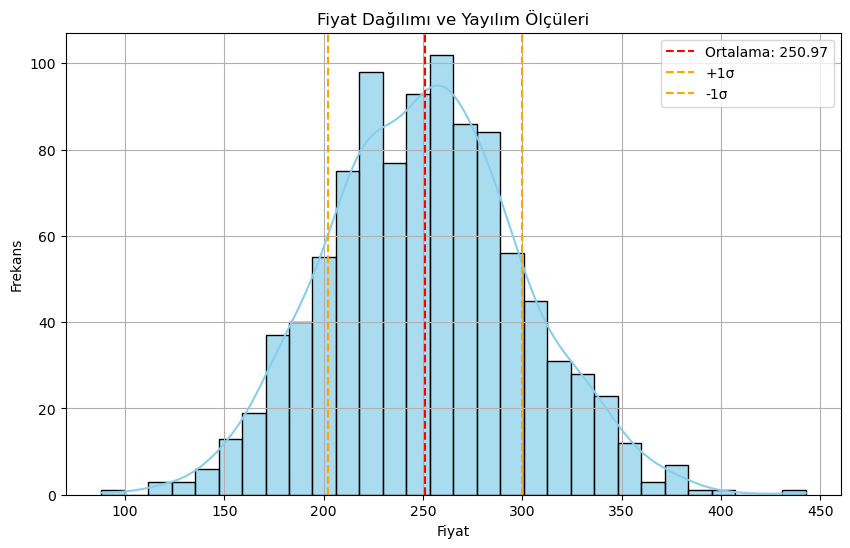

In [18]:
# Görselleştirme: Varyansı Gözle Görelim
plt.figure(figsize=(10,6))
sns.histplot(df['fiyat'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, kde=True)
plt.axvline(ortalama, color='red', linestyle='--', label=f'Ortalama: {ortalama:.2f}')
plt.axvline(ortalama + standart_sapma, color='orange', linestyle='--', label=f'+1σ')
plt.axvline(ortalama - standart_sapma, color='orange', linestyle='--', label=f'-1σ')
plt.title('Fiyat Dağılımı ve Yayılım Ölçüleri')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.legend()
plt.grid(True)
plt.show()

📌 Bu grafikte:
- Ortalama (merkez)
- ±1σ aralığı (verinin %68’i burada)
- Varyans ve sapmanın görsel karşılığı

## 🤔 Ne Zaman Kullanılır?

| Soru | Yöntem |
|------|--------|
| “Bu özellik sabit mi?” | Standart sapma düşükse → evet |
| “Veride aykırı değer var mı?” | Varyans/Std yüksekse → muhtemelen var |
| “Hangi özellik daha kararlı?” | Varyans sıralamasına bak |
| “Modelin giriş verisi tutarlı mı?” | Standart sapmayı kontrol et |


## 🧪 Gerçek Hayat Senaryosu: Kalite Kontrol

Bir fabrikada üretilen ürünlerin ağırlıkları:

In [19]:
agirliklar = np.random.normal(loc=100, scale=2, size=1000)  # Ortalama 100 gr, std: 2gr
agirlik_df = pd.DataFrame({'agirlik': agirliklar})

#### ✅ Eğer varyans çok büyükse → üretimde tutarsızlık var  
#### ✅ Varyans küçükse → üretim tutarlı

In [21]:
print("Ağırlık Varyansı:", round(agirlik_df['agirlik'].var(), 2))
print("Ağırlık Standart Sapması:", round(agirlik_df['agirlik'].std(), 2))

Ağırlık Varyansı: 4.19
Ağırlık Standart Sapması: 2.05


📌 Standart sapma 2 gram → neredeyse tüm ürünler 98–102 gram aralığında → üretim tutarlı.

In [22]:
# sample veri seti içeren başka bir örnek:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample price data with different variances
low_var_prices = np.random.normal(loc=250, scale=10, size=100)  # Mean 250, std=10
high_var_prices = np.random.normal(loc=250, scale=50, size=100)  # Mean 250, std=50

# Create sales data correlated with price
sales_low = np.random.poisson(lam=10, size=100) + (low_var_prices-250)/5
sales_high = np.random.poisson(lam=10, size=100) + (high_var_prices-250)/20

# Combine into DataFrames
df_low_var = pd.DataFrame({
    'fiyat': np.round(low_var_prices, 2),
    'satis_adedi': np.round(sales_low).astype(int)
})

df_high_var = pd.DataFrame({
    'fiyat': np.round(high_var_prices, 2),
    'satis_adedi': np.round(sales_high).astype(int)
})


In [23]:
# Display sample data
print("=== Low Variance Product (First 5 Rows) ===")
print(df_low_var.head())
print("\n=== High Variance Product (First 5 Rows) ===")
print(df_high_var.head())

=== Low Variance Product (First 5 Rows) ===
    fiyat  satis_adedi
0  254.97           15
1  248.62           12
2  256.48           10
3  265.23           13
4  247.66           13

=== High Variance Product (First 5 Rows) ===
    fiyat  satis_adedi
0  179.23            8
1  228.97            5
2  232.86            7
3  209.89            7
4  241.94           15


In [24]:
# Calculate statistics for low variance product
print("\n=== Low Variance Product Analysis ===")
print(f"Ortalama Fiyat: {df_low_var['fiyat'].mean():.2f}")
print(f"Varyans: {df_low_var['fiyat'].var():.2f}")
print(f"Standart Sapma: {df_low_var['fiyat'].std():.2f}")


=== Low Variance Product Analysis ===
Ortalama Fiyat: 248.96
Varyans: 82.48
Standart Sapma: 9.08


In [25]:
# Calculate statistics for high variance product
print("\n=== High Variance Product Analysis ===")
print(f"Ortalama Fiyat: {df_high_var['fiyat'].mean():.2f}")
print(f"Varyans: {df_high_var['fiyat'].var():.2f}")
print(f"Standart Sapma: {df_high_var['fiyat'].std():.2f}")


=== High Variance Product Analysis ===
Ortalama Fiyat: 251.12
Varyans: 2273.69
Standart Sapma: 47.68


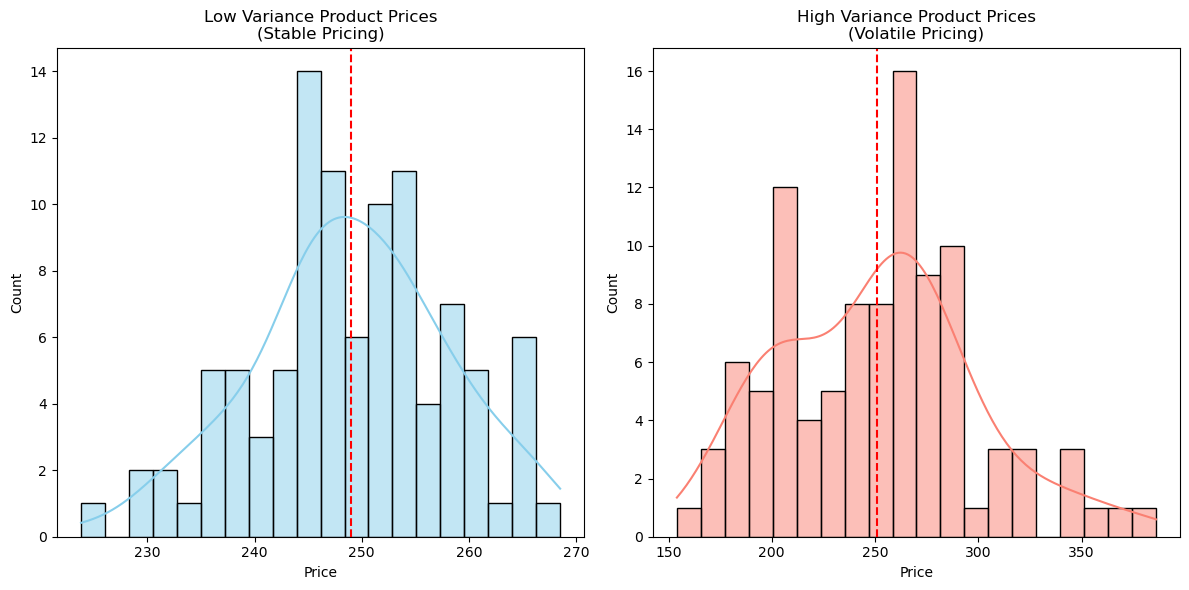

In [26]:
# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_low_var['fiyat'], bins=20, color='skyblue', kde=True)
plt.title('Low Variance Product Prices\n(Stable Pricing)')
plt.xlabel('Price')
plt.axvline(df_low_var['fiyat'].mean(), color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(df_high_var['fiyat'], bins=20, color='salmon', kde=True)
plt.title('High Variance Product Prices\n(Volatile Pricing)')
plt.xlabel('Price')
plt.axvline(df_high_var['fiyat'].mean(), color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [27]:
# Manual calculation demonstration
print("\n=== Manual Calculation Example ===")
mean_price = df_low_var['fiyat'].mean()
df_low_var['sapma_kare'] = (df_low_var['fiyat'] - mean_price)**2
manual_variance = df_low_var['sapma_kare'].mean()
manual_std = np.sqrt(manual_variance)

print(f"Manuel Varyans: {manual_variance:.2f}")
print(f"Manuel Standart Sapma: {manual_std:.2f}")
print(f"Pandas Varyans: {df_low_var['fiyat'].var():.2f} (ddof=1 adjustment)")


=== Manual Calculation Example ===
Manuel Varyans: 81.66
Manuel Standart Sapma: 9.04
Pandas Varyans: 82.48 (ddof=1 adjustment)


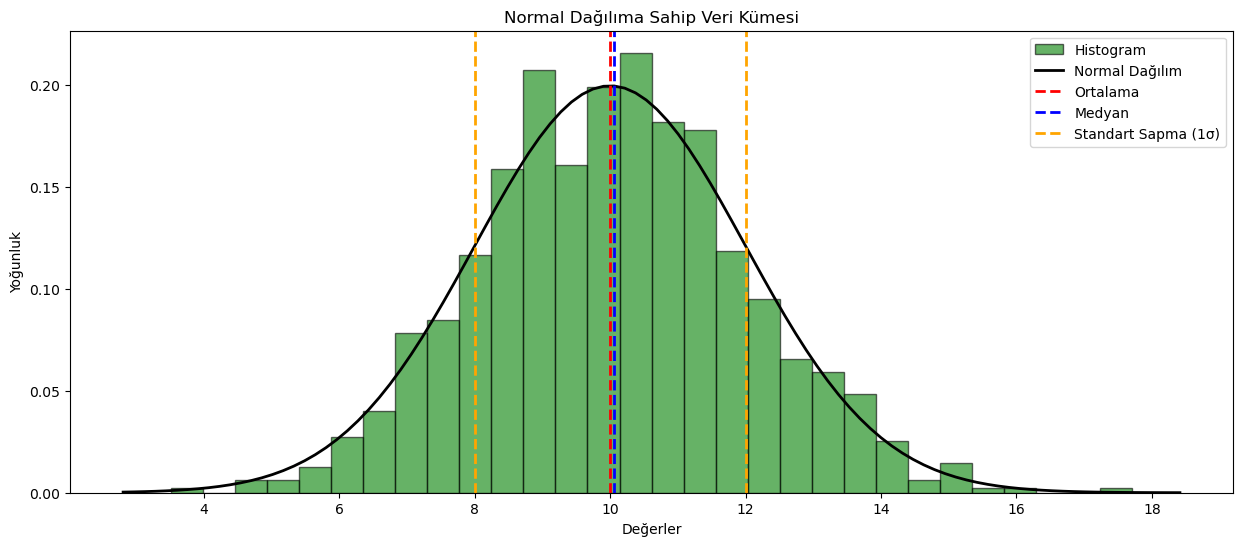

Ortalama: 10
Medyan: 10.050601224469776
Standart Sapma: 2
Varyans: 3.8316199589260687


In [28]:
# Normal Dağılım, Medyan, Varyans ve Standart Sapma veri seti üzerinden gösterim, grafik çizimi

import numpy as np
import matplotlib.pyplot as plt

# Normal dağılıma sahip veri oluşturma
mean_value = 10  # Ortalama
std_deviation = 2  # Standart Sapma

np.random.seed(42)  # Sabit bir rastgelelik için seed ayarı
data = np.random.normal(mean_value, std_deviation, 1000)  # 1000 veri noktası

# İstatistiksel değerleri hesapla
median_value = np.median(data)
variance = np.var(data)

# Grafik oluşturma
plt.figure(figsize=(15, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')  # Histogram

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = (1 / (std_deviation * np.sqrt(2 * np.pi))) * np.exp(-(x - mean_value)**2 / (2 * std_deviation**2))
plt.plot(x, pdf, 'k', linewidth=2, label='Normal Dağılım')  # Normal dağılım grafiği

# İstatistiksel değerleri grafik üzerinde göster
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Ortalama')  # Ortalama çizgisi
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Medyan')  # Medyan çizgisi
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=2, label='Standart Sapma (1σ)')  # 1 Standart Sapma üzerinde çizgi
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=2)  # 1 Standart Sapma altında çizgi

plt.title('Normal Dağılıma Sahip Veri Kümesi');
plt.xlabel('Değerler');
plt.ylabel('Yoğunluk');
plt.legend();
plt.show();

print("Ortalama:", mean_value);
print("Medyan:", median_value);
print("Standart Sapma:", std_deviation);
print("Varyans:", variance);